# Failed Banks ML Project

## Econ 1680: MLTA and Econ

#### Name: Lena Kim

Research Question: Given a failed bank’s balance sheet metrics, how can we predict
whether it is acquired by a national bank, a regional bank, or not acquired at all? Which
metrics contribute the most weight to this decision?

IMPORTANT: This notebook focuses on the Multilayer Perceptron Method in order to answer the classification problem posed above. I will import code from the preliminary/overarching notebook ML_BASES with the "run" method.


In [41]:
#econ1680MLProject
%run ML_BASES.ipynb

In [42]:
from sklearn.neural_network import MLPClassifier


## Data Preprocessing for Neural Networks

In [43]:
#Checking dimensions of model to prevent bugs later on:
m_train = X_train.shape[0]
m_test =  X_test.shape[0]
num_features = X_train.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Number of features for each observation = " + str(num_features))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: m_train = 103
Number of testing examples: m_test = 26
Number of features for each observation = 9
X_train shape: (103, 9)
y_train shape: (103,)
X_test shape: (26, 9)
y_test shape: (26,)


In [44]:
# Set upKfolds:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=1680)
#Preprocess the data:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Fixes found when running the models:
#jupyter suggested to impute NaN features. After doing that:
imputer = SimpleImputer(strategy='mean')

#Fit the imputer:

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


# MLP Classifier: 

In [45]:
#create a Multi-layer Perceptron (MLP) classifier:

#Let's tune the learning rate:
learning_rates = [0.01, 0.1, 1.0, 10.0, 15.0]

#create an MLPClassifier for each learning rate:
models = []
for lr in learning_rates:
    model = MLPClassifier(hidden_layer_sizes=(8, 4),
                          random_state=1680,
                          activation='logistic',
                          solver='adam',
                          max_iter=500,
                          verbose=False,
                          learning_rate_init=lr)
    models.append(model)

#fit the model on each learning rate
loss_values = []
for lr, model in zip(learning_rates, models):
    model.fit(X_train, y_train)
    loss_values.append((lr, model.loss_))


#find the learning rate that minimizes the loss:
best_learning_rate = min(loss_values, key=lambda x: x[1])[0]
print('Best Learning Rate:',  best_learning_rate)

best_model = MLPClassifier(hidden_layer_sizes=(8, 4),
                           random_state=1680,
                           activation='logistic',
                           solver='adam',
                           max_iter=500,
                           verbose=True,
                           learning_rate_init=best_learning_rate)
best_model.fit(X_train, y_train)

#best models:
print('MLP accuracy train:', accuracy_score(y_train, best_model.predict(X_train)))
print('MLP accuracy test:', accuracy_score(y_test, best_model.predict(X_test)))

Best Learning Rate: 0.01
Iteration 1, loss = 1.13363944
Iteration 2, loss = 1.11868669
Iteration 3, loss = 1.10601981
Iteration 4, loss = 1.09475333
Iteration 5, loss = 1.08488888
Iteration 6, loss = 1.07640956
Iteration 7, loss = 1.06918398
Iteration 8, loss = 1.06268695
Iteration 9, loss = 1.05758446
Iteration 10, loss = 1.05337572
Iteration 11, loss = 1.04997502
Iteration 12, loss = 1.04730995
Iteration 13, loss = 1.04531495
Iteration 14, loss = 1.04392511
Iteration 15, loss = 1.04307078
Iteration 16, loss = 1.04267364
Iteration 17, loss = 1.04264484
Iteration 18, loss = 1.04288637
Iteration 19, loss = 1.04329577
Iteration 20, loss = 1.04377380
Iteration 21, loss = 1.04269558
Iteration 22, loss = 1.05146588
Iteration 23, loss = 1.04928217
Iteration 24, loss = 1.04936691
Iteration 25, loss = 1.04819261
Iteration 26, loss = 1.04696156
Iteration 27, loss = 1.04554996
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
MLP accuracy train: 0.49514563

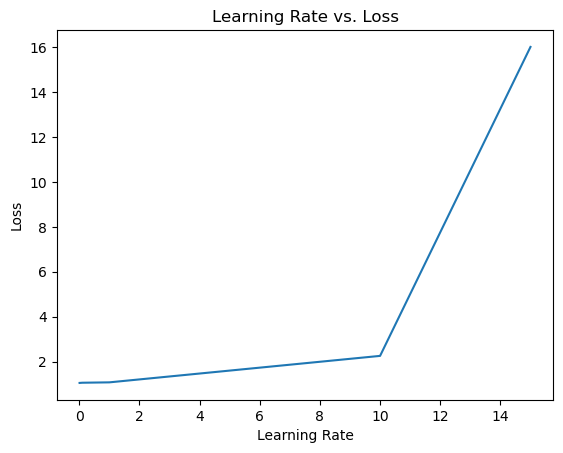

In [46]:
plt.plot([lr for lr, _ in loss_values], [loss for _, loss in loss_values])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs. Loss')
plt.savefig('Learning Rate')
plt.show()

# Building a simple neural network from scratch using TensorFlow:
Step 1: Define model structure with sigmoid function

In [81]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes for multinomial classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss for multiclass classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/20


2024-03-30 14:36:08.045470: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3/3 [==============================] - 0s 42ms/step - loss: nan - accuracy: 0.3478 - val_loss: nan - val_accuracy: 0.5455
Epoch 2/20
3/3 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.4891 - val_loss: nan - val_accuracy: 0.5455
Epoch 3/20
3/3 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.4891 - val_loss: nan - val_accuracy: 0.5455
Epoch 4/20
3/3 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.4891 - val_loss: nan - val_accuracy: 0.5455
Epoch 5/20
3/3 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.4891 - val_loss: nan - val_accuracy: 0.5455
Epoch 6/20
3/3 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.4891 - val_loss: nan - val_accuracy: 0.5455
Epoch 7/20
3/3 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.4891 - val_loss: nan - val_accuracy: 0.5455
Epoch 8/20
3/3 [==============================] - 0s 11ms/step - loss: nan - accura